# Link Prediction Lab

In [4]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

rnd.seed()

## Graph Input

In [36]:
G = nx.read_edgelist("Link_Prediction/karate")

Number of nodes: 34
Number of edges: 78


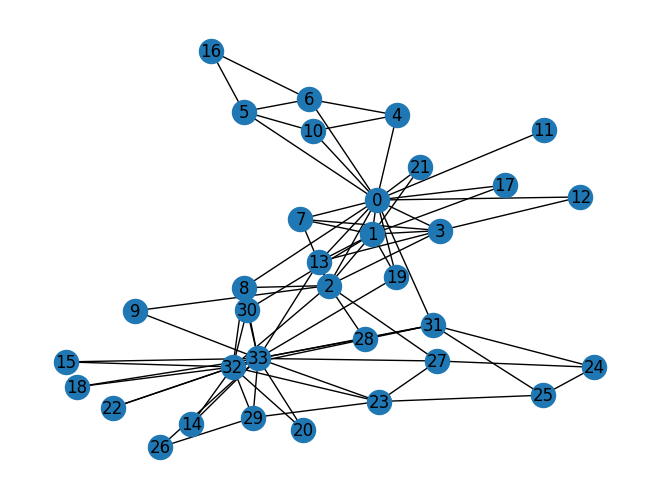

In [38]:

# Check basic information about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")



nx.draw(G, with_labels=True)
plt.show()


## Computing Common Neighbors Score

We define the "common neighbours" link score:

In [7]:
def common_neighbors(G,i,j):
    # G - the graph
    # i,j - the link
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))

In [8]:
common_neighbors(G,'31','17')

2

## Link Prediction

We define a function which returns a sorted list of of scores from a node to other possible nodes in the graph:

In [9]:
def link_list(G,i,score_func):
    # G - the graph
    # i - the node
    # score_func - the link scoring function, having the signature score_func(G,i,j)
    links = []
    for j in G.nodes():
        if not G.has_edge(i,j):
            e = (i,j)
            sc = score_func(G,i,j)
            links.append([e,sc])
    links.sort(key = lambda x: x[1], reverse = True) 
    return links

In [10]:
link_list(G,'31',common_neighbors)

[[('31', '2'), 10],
 [('31', '1'), 9],
 [('31', '31'), 6],
 [('31', '3'), 6],
 [('31', '13'), 5],
 [('31', '8'), 5],
 [('31', '23'), 5],
 [('31', '7'), 4],
 [('31', '6'), 4],
 [('31', '5'), 4],
 [('31', '30'), 4],
 [('31', '27'), 4],
 [('31', '29'), 4],
 [('31', '19'), 3],
 [('31', '10'), 3],
 [('31', '4'), 3],
 [('31', '21'), 2],
 [('31', '17'), 2],
 [('31', '12'), 2],
 [('31', '9'), 2],
 [('31', '16'), 2],
 [('31', '14'), 2],
 [('31', '15'), 2],
 [('31', '18'), 2],
 [('31', '20'), 2],
 [('31', '22'), 2],
 [('31', '26'), 2],
 [('31', '11'), 1]]

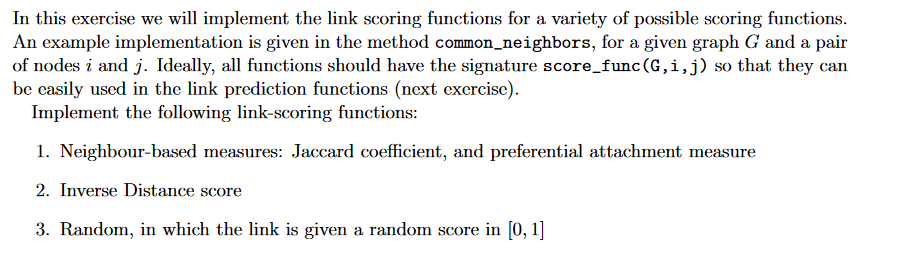

In [15]:
from IPython.display import Image

# Display the image
Image(filename='Link_Prediction/img.png')


In [37]:
def link_prediction(G, k, i, score_func):
    # Create a list of potential edges (i, j) where j is not already connected to i
    ebunch = [(i, j) for j in G.nodes if i != j and not G.has_edge(i, j)]

    # Compute the scores using the provided scoring function
    preds = score_func(G, ebunch)

    # Sort the predicted links by score in descending order and select the top k links
    scores = sorted(preds, key=lambda x: x[2], reverse=True)[:k]
    return scores

predicted_links = link_prediction(G, k=3, i=0, score_func=nx.jaccard_coefficient)

for u, v, p in predicted_links:
    print(f'({u}, {v}) -> {p:.8f}')


NodeNotFound: Node 0 not in G.

In [18]:
def preferential_attachment(G, i, j):
    return G.degree(i) * G.degree(j)
def inverse_distance(G, i, j):
    try:
        distance = nx.shortest_path_length(G, source=i, target=j)
        return 1 / distance
    except nx.NetworkXNoPath:
        return 0


In [19]:
import random

def random_score(G, i, j):
    return random.random()


In [20]:
def link_prediction(G, k, i, score_func):
    scores = []
    for j in G.nodes:
        if i != j and not G.has_edge(i, j):
            score = score_func(G, i, j)
            scores.append((j, score))

    # Sort by score in descending order and select the top k links
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:k]


In [21]:
def evaluate_link_prediction(G, k, score_func):
    correct_predictions = 0
    total_predictions = 0

    # For each edge in the graph, remove it and try to predict it
    for i, j in list(G.edges()):
        G.remove_edge(i, j)
        predicted_links = link_prediction(G, k, i, score_func)
        G.add_edge(i, j)

        # Check if the removed link is among the top k predictions
        if any(pred == j for pred, _ in predicted_links):
            correct_predictions += 1

        total_predictions += 1

    accuracy = correct_predictions / total_predictions
    return accuracy


In [35]:

# Run link prediction evaluation using the loaded karate graph
k_values = [1, 3, 5]
scoring_functions = {
    "Jaccard Coefficient": nx.jaccard_coefficient,
    "Preferential Attachment": nx.preferential_attachment,
    "Adamic/Adar Index": nx.adamic_adar_index,
    "Resource Allocation Index": nx.resource_allocation_index
}

for score_func_name, score_func in scoring_functions.items():
    print(f"\nEvaluating {score_func_name}...")
    for k in k_values:
        accuracy = evaluate_link_prediction(G, k, score_func)
        print(f"k={k}, Accuracy: {accuracy:.4f}")



Evaluating Jaccard Coefficient...


TypeError: jaccard_coefficient() takes from 1 to 2 positional arguments but 3 were given